In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("tensorflow: ", tf.__version__) #1.14.0

tensorflow:  1.14.0


In [2]:
#import the fashion mnist dataset (from Zalando)
fashion_mnist = keras.datasets.fashion_mnist
data = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data
#(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
#preprocess the images
train_x = np.expand_dims(train_images/255.0, axis=3)
test_x = np.expand_dims(test_images/255.0, axis=3)

In [5]:
train_y = train_labels
test_y = test_labels

# Miminimze one class

In [6]:
# define function to select only specific category
def select_max_category(data, label, category, max_nr_for_category):
    new_data = []
    new_label = []
    for i in range(len(label)):
        if label[i] == category:
            if len(new_label) <= max_nr_for_category-1:
                new_label.append(label[i])
                new_data.append(data[i])
    #new_data = np.array(new_data)
    #new_label = np.array(new_label)
    return new_data, new_label

In [7]:
#create an array with only the "small class"

# the small class is now zero, the names will stay though
all_one_x = train_x[np.where(train_y==0)[0]]
all_one_y = train_y[np.where(train_y==0)[0]]
print(all_one_x.shape, all_one_y.shape)

(6000, 28, 28, 1) (6000,)


In [8]:
#create a set with only ones in it for experimenting
# with ones, as we want to reduce the zeros
all_zero_x = test_x[np.where(test_y==1)[0]]
all_zero_y = test_y[np.where(test_y==1)[0]]

In [9]:
# select some pictures of class 1 and define how many
# in the original dataset 7000 images per class are available
rate = 0.005
one_x, one_y = select_max_category(train_x, train_y, 0, 6000*rate)

In [10]:
one_x = np.array(one_x)
one_x.shape

(30, 28, 28, 1)

In [11]:
one_y = np.array(one_y)
one_y.shape

(30,)

In [12]:
#delete class 0 from the training set
train_x = np.delete(train_x, np.where(train_y==0)[0], axis = 0)
print(train_x.shape)

(54000, 28, 28, 1)


In [13]:
train_y = np.delete(train_y, np.where(train_y==0)[0], axis = 0)
print(train_y.shape)

(54000,)


In [14]:
train_x = np.append(train_x, one_x, axis=0)
train_y = np.append(train_y, one_y, axis=0)
#train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [15]:
print(train_x.shape, train_y.shape)

(54030, 28, 28, 1) (54030,)


In [16]:
#shuffle the data
n = train_x.shape[0]
## numpy has a shuffle method
permutation = np.arange(n) #n = number of pictures/length of data
np.random.shuffle(permutation)
    
train_x = [train_x[i] for i in permutation]
train_y = [train_y[i] for i in permutation]
#labels_ohe_shuffled = [labels_ohe[i] for i in permutation]

train_x = np.array(train_x)
train_y = np.array(train_y)

train_y = np.array(pd.get_dummies(train_y)) #onehotencoding

In [17]:
print(train_x.shape)
print(train_y.shape)

(54030, 28, 28, 1)
(54030, 10)


# Construct a baseline CNN

In [21]:
model = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.5)),
    keras.layers.Dense(10, activation='softmax')
])

W1114 16:56:32.672544  9860 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                3

In [23]:
history = model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
54030/54030 [==============================] - 66s 1ms/sample - loss: 0.4469 - acc: 0.8410
Epoch 2/10
54030/54030 [==============================] - 51s 945us/sample - loss: 0.3116 - acc: 0.8904
Epoch 3/10
54030/54030 [==============================] - 43s 795us/sample - loss: 0.2732 - acc: 0.9032
Epoch 4/10
54030/54030 [==============================] - 45s 830us/sample - loss: 0.2498 - acc: 0.9089
Epoch 5/10
54030/54030 [==============================] - 45s 837us/sample - loss: 0.2328 - acc: 0.9174
Epoch 6/10
54030/54030 [==============================] - 43s 800us/sample - loss: 0.2188 - acc: 0.9210
Epoch 7/10
54030/54030 [==============================] - 45s 837us/sample - loss: 0.2102 - acc: 0.9248
Epoch 8/10
54030/54030 [==============================] - 42s 780us/sample - loss: 0.2059 - acc: 0.9244
Epoch 9/10
54030/54030 [==============================] - 42s 775us/sample - loss: 0.1979 - acc: 0.9284
Epoch 10/10
54030/54030 [==============================] - 42s 778

In [24]:
model.save('B_004_model_b.h5') #save the model for the scrumbled data

In [18]:
model = tf.keras.models.load_model('B_004_model_b.h5')

W1206 11:24:32.362967 11460 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 11:24:32.362967 11460 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W1206 11:24:32.362967 11460 deprecation.py:506] From c:\users\annar\project_folder\venv\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_op

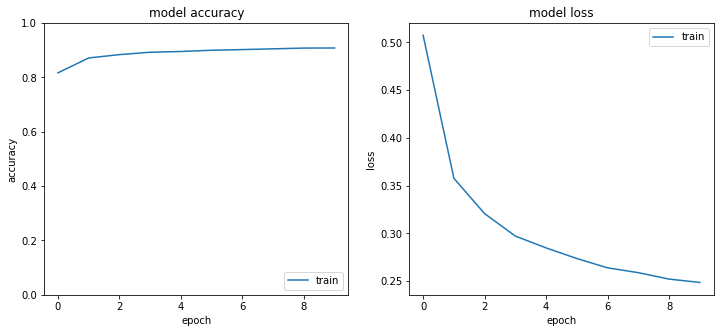

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

# Check the baseline model for a rarely seen picture

In [19]:
picture = 100
picture_end = picture + 1

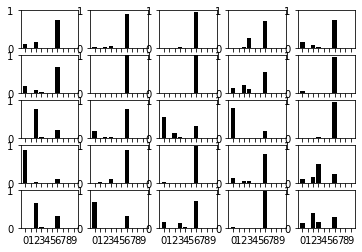

In [20]:
all_one_x.shape
for i in range(800,825,1):
    j = 1+i
    k = i-799
    prediction = model.predict([all_one_x[i:j], 1])[0]
    x = [0,1,2,3,4,5,6,7,8,9]
    plt.subplot(5,5,k)
    plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
    plt.xticks(x)
    plt.ylim(0,1.0)
    #plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.title('probabilities predicted')

Text(0.5, 1.0, 'image')

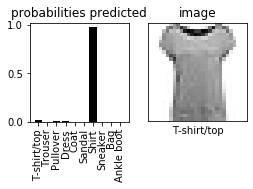

In [21]:
prediction = model.predict([all_one_x[picture:picture_end], 1])[0]
x = [0,1,2,3,4,5,6,7,8,9]
plt.subplot(2,3,1)
plt.bar(x,prediction, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('probabilities predicted')

plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

# Create a model with MC Dropout

In [26]:
model_mc2 = keras.Sequential([
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu', input_shape=(28,28,1)),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(8, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout((0.3)),
    keras.layers.Convolution2D(16, kernel_size=(3,3), padding="same", activation='relu'),
    keras.layers.Dropout((0.3)),
    keras.layers.Flatten(),
    keras.layers.Dropout((0.3)),
    keras.layers.Dense(10, activation='softmax')
])
model_mc2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_mc2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 16)       

In [24]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [28]:
history_mc2 = model_mc2.fit(train_x, train_y, epochs = 10)

Epoch 1/10
54030/54030 [==============================] - 61s 1ms/sample - loss: 0.5207 - acc: 0.8066
Epoch 2/10
54030/54030 [==============================] - 55s 1ms/sample - loss: 0.3809 - acc: 0.86290s - loss: 0.3807 - acc
Epoch 3/10
54030/54030 [==============================] - 58s 1ms/sample - loss: 0.3369 - acc: 0.8789
Epoch 4/10
54030/54030 [==============================] - 54s 998us/sample - loss: 0.3186 - acc: 0.8857
Epoch 5/10
54030/54030 [==============================] - 52s 954us/sample - loss: 0.3026 - acc: 0.8915
Epoch 6/10
54030/54030 [==============================] - 51s 946us/sample - loss: 0.2930 - acc: 0.8957
Epoch 7/10
54030/54030 [==============================] - 52s 954us/sample - loss: 0.2825 - acc: 0.8976
Epoch 8/10
54030/54030 [==============================] - 51s 950us/sample - loss: 0.2833 - acc: 0.8981
Epoch 9/10
54030/54030 [==============================] - 54s 994us/sample - loss: 0.2774 - acc: 0.8985
Epoch 10/10
54030/54030 [======================

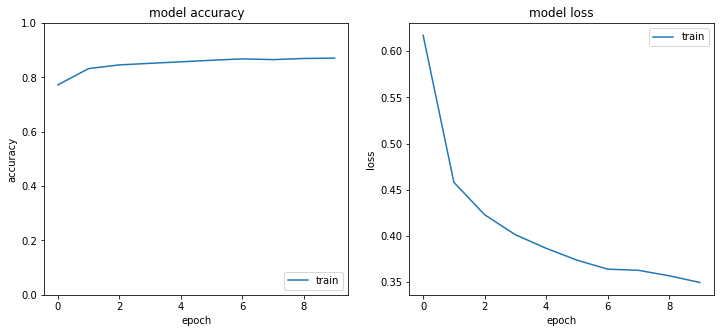

In [43]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_mc2.history['acc'])
#plt.plot(history_b.history['val_accuracy'])
plt.ylim(0,1)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,2)
plt.plot(history_mc2.history['loss'])
#plt.plot(history_b.history['va_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.show()

In [29]:
model_mc2.save('B_004_model_mc2.h5')

In [23]:
model_mc2 = tf.keras.models.load_model('B_004_model_mc2.h5')

## predictions for a rarely seen image (trousers)

In [46]:
import tensorflow.keras.backend as K
model_mc2_pred = K.function([model_mc2.input, K.learning_phase()], [model_mc2.output])

In [25]:
picture = 100
picture_end = picture+1
model_mc2_pred([all_one_x[picture:picture_end], 1])[0]

array([[6.4111002e-02, 8.3444221e-04, 6.7694942e-03, 3.9929371e-02,
        5.5838122e-05, 3.1890347e-06, 8.8112020e-01, 3.3554528e-07,
        7.1748020e-03, 1.4066380e-06]], dtype=float32)

(100, 10)


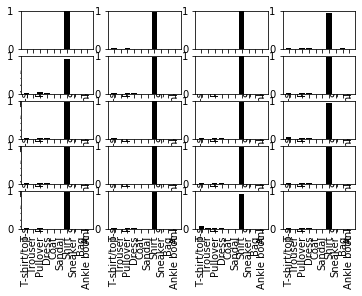

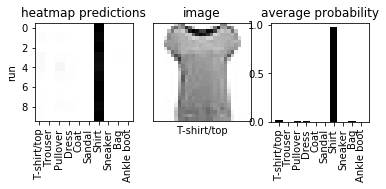

[1.4788115e-02 7.9782076e-05 1.0669410e-02 3.5388356e-03 6.1935880e-06
 6.4097194e-06 9.7037923e-01 2.8737642e-07 5.3105486e-04 7.6449999e-07]


In [26]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_mc2_pred([all_one_x[picture:picture_end], 1])[0]
for i in range(700,799,1):
    pred = model_mc2_pred([all_one_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_one_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_one_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

## prediction for an often seen image (class 0)

(100, 10)


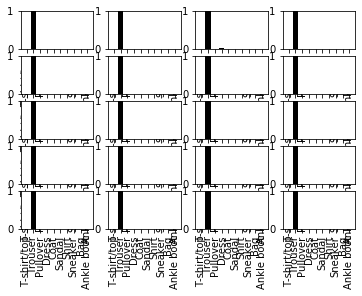

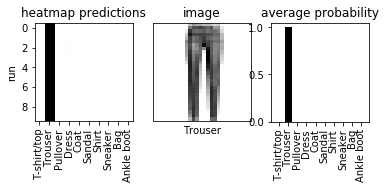

[9.0484216e-09 9.9959111e-01 1.1881007e-06 3.3187756e-04 6.6459186e-05
 1.0030650e-06 6.7255069e-06 1.0330204e-07 5.9031919e-07 1.0050024e-06]


In [27]:
x = [0,1,2,3,4,5,6,7,8,9]
predictions = model_mc2_pred([all_zero_x[picture:picture_end], 1])[0]
for i in range(700,799,1):
    pred = model_mc2_pred([all_zero_x[picture:picture_end], 1])[0]
    #print(pred)
    predictions = np.append(predictions, pred, axis = 0)
    #print(i, predictions)

print(predictions.shape)

for i in range(20):
    plt.subplot(5,4,i+1)
    plt.bar(x, predictions[i], color = ['black'])
    plt.xticks(np.arange(10), class_names, rotation = 90)
    #plt.yticks([0.25, 0.5, 0.75, 1.0])
    plt.ylim([0,1])
plt.show()

plt.subplot(2,3,1)
plt.yticks([0,2,4,6,8])
plt.imshow(predictions[0:10], cmap='binary', interpolation='none')
plt.ylabel('run')
#plt.xlabel('class')
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('heatmap predictions')
plt.subplot(2,3,2)
plt.xticks([])
plt.yticks([])
plt.imshow(np.squeeze(all_zero_x[picture:picture_end][0], axis = 2), cmap=plt.cm.binary)
plt.xlabel(class_names[all_zero_y[picture]])
plt.title('image')

#### try to also show the barchart with the average probability
d = predictions
predictions_mean = d.mean(axis=0)
#x = [0,1,2,3,4,5,6,7,8]

plt.subplot(2,3,3)
plt.bar(x,predictions_mean, color = ['black']) #color=(0.3,0.3,0.3,1.0)
plt.xticks(np.arange(10), class_names, rotation = 90)
plt.title('average probability')

plt.show()
print(predictions_mean)

## evaluate baseline CNN

In [33]:
# evaluate the baseline CNN on the test dataset
test_y_ohe = np.array(pd.get_dummies(test_y))
model.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 2s 197us/sample - loss: 0.6286 - acc: 0.8544


[0.6285885012030602, 0.8544]

In [34]:
# evaluate the baseline CNN on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [35]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.2005

# Check and quantify BNN

In [ ]:
#import the helper functions for evaluation
from helper_functions import b_predict_mc as bpmc
from helper_functions import m_predict_mc as apmc

## evaluate the BNN with the standard prediction method

In [36]:
test_y_ohe = np.array(pd.get_dummies(test_y))
model_mc2.evaluate(test_x, test_y_ohe)

10000/10000 [==============================] - 2s 206us/sample - loss: 0.5344 - acc: 0.8310


[0.5344202354192734, 0.831]

In [37]:
# evaluate the BNN with standard prediction on the rarely seen pictures only
l = []
for i in range(all_one_x.shape[0]):
    pred = model_mc2.predict(all_one_x[i:i+1])
    l.append(pred.argmax())

In [38]:
(l == all_one_y).sum()/all_one_x.shape[0]

0.11916666666666667

# Check and quantify BNN

In [28]:
#import the helper functions for evaluation
from helper_functions import b_predict_mc as bpmc
from helper_functions import m_predict_mc as apmc

## Bernoulli Predict

In [29]:
list_of_predictions = [5, 10, 25, 50, 100]
list_of_dev = [0.1, 0.2, 0.3, 0.4, 0.5]

In [30]:
pred = bpmc.b_predict_mc(test_x, model_mc2_pred, 10, 5)

In [31]:
#import pandas as pd
p = pd.DataFrame(pred)
p['soll'] = test_y
#p.to_csv("A_008_test_set_with_predictions_5.csv", ";")

In [32]:
#just the predictions:
(p[0] == test_y).sum()/test_x.shape[0] #0.8805 #07959

0.7262

In [33]:
#for different uncertainty levels
for i in list_of_dev:
    p['unc_est'] = np.where(p[3] >= i, 9, p[0])
    w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.6126
0.2 :  0.6126
0.3 :  0.6126
0.4 :  0.6126
0.5 :  0.7262


In [34]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                p['unc_est'] = np.where(((p[3] >= i) & (p[3]<=j)), 9, p[0])
                w = (p['unc_est'] == test_y).sum()/test_x.shape[0]
                print(i, "-", j, ": " , w)

0.1 - 0.2 :  0.7262
0.1 - 0.3 :  0.7262
0.1 - 0.4 :  0.6564
0.1 - 0.5 :  0.6126
0.2 - 0.3 :  0.7262
0.2 - 0.4 :  0.6564
0.2 - 0.5 :  0.6126
0.3 - 0.4 :  0.6564
0.3 - 0.5 :  0.6126
0.4 - 0.5 :  0.6126


### plot the results

In [43]:
x = [5, 10, 25, 50, 100]
y = [0.8735, 0.8802, 0.8811, 0.8833, 0.8828]
y50 = [0.8735, 0.8698, 0.8635, 0.8668, 0.8664]
y40 = [0.7642, 0.7881, 0.8009, 0.8016, 0.8056]
y30 = [0.7642, 0.7231, 0.7584, 0.8668, 0.7524]
y20 = [0.7642, 0.7231, 0.659, 0.6744, 0.6893]
y10 = [0.7642, 0.7231, 0.659, 0.6136, 0.5745]

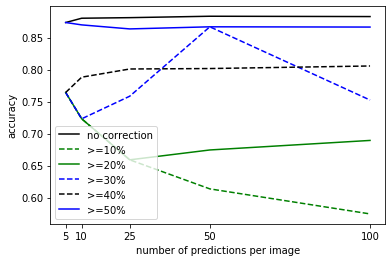

In [44]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(list_of_predictions)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()

## Average prediction

In [45]:
pred = apmc.avg_predict_mc(test_x, model_mc2_pred, 10, 5)

In [46]:
df = pd.DataFrame(pred)
df['soll'] = test_y
#df.to_csv("A_009_test_with_max_pred_5.csv", ";")

In [47]:
#just the predictions:
(df[0] == test_y).sum()/test_x.shape[0]

0.8223

In [48]:
#for different uncertainty levels
for i in list_of_dev:
    df['unc_est'] = np.where(df[3] >= i, 9, df[0])
    w = (df['unc_est'] == test_y).sum()/test_x.shape[0]
    print(i, ": " , w)

0.1 :  0.6079
0.2 :  0.7301
0.3 :  0.8023
0.4 :  0.821
0.5 :  0.8223


In [49]:
#evaluate with ranges
for i in list_of_dev:
    for j in list_of_dev:
        if j>i:
                df['unc_est'] = np.where(((df[3] >= i) & (df[3]<=j)), 9, df[0])
                w = (df['unc_est'] == test_y).sum()/test_x.shape[0]                
                print(i, "-", j, ": " , w)
            

0.1 - 0.2 :  0.7001
0.1 - 0.3 :  0.6279
0.1 - 0.4 :  0.6092
0.1 - 0.5 :  0.6079
0.2 - 0.3 :  0.7501
0.2 - 0.4 :  0.7314
0.2 - 0.5 :  0.7301
0.3 - 0.4 :  0.8036
0.3 - 0.5 :  0.8023
0.4 - 0.5 :  0.821


In [50]:
x = [5, 10, 25, 50, 100]
y = [0.8783, 0.8807, 0.8814, 0.8847, 0.8844]
y50 = [0.8783, 0.8807, 0.8814, 0.8847, 0.8844]
y40 = [0.878, 0.8806, 0.8814, 0.8847, 0.8844]
y30 = [0.8681, 0.8763, 0.8794, 0.8831, 0.8839]
y20 = [0.7989, 0.8086, 0.8176, 0.8231, 0.825]
y10 = [0.6373, 0.6083, 0.5828, 0.5802, 0.5761]

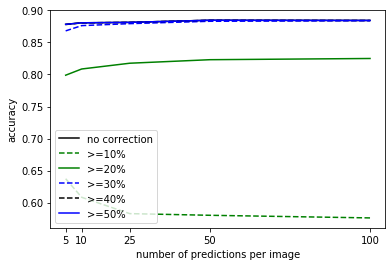

In [51]:
import matplotlib.pyplot as plt

plt.plot(x,y, label='no correction', color='black')
plt.plot(x, y10, label='>=10%', color='green', linestyle='--')
plt.plot(x, y20, label='>=20%', color='green', linestyle='-')
plt.plot(x, y30, label='>=30%', color='blue', linestyle='--')
plt.plot(x, y40, label='>=40%', color='black', linestyle='--')
plt.plot(x, y50, label='>=50%', color='blue', linestyle='-')

plt.xlabel('number of predictions per image')
plt.ylabel('accuracy')
plt.xticks(list_of_predictions)
#plt.yticks(list_of_dev)

plt.legend(loc='lower left')
plt.show()